In [3]:
import numpy as np
import glob
from random import shuffle
import cv2
from matplotlib import pyplot as plt


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform

Using TensorFlow backend.


In [5]:
#ruta data
data_path ="C:/Users/Gabriel/Desktop/Lab_neuronales/Lab3/PetImages/*/*"

def ver_imagen(img):
    cv2.imshow('imagen carro',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
#cargar una imagen
def cargar_imagen(addr):
    # read an image and resize to (224, 224)
    # cv2 load images as BGR, convert it to RGB
    img = cv2.imread(addr)
    if img is None:
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img/255
    return img



In [7]:
#definir labels
addrs = glob.glob(data_path)
labels = [0 if 'Cat' in addr else 1 for addr in addrs]  # 0 = Gato, 1 = Perro

In [8]:
#Revolver los datos
c = list(zip(addrs, labels))
shuffle(c)
addrs, labels = zip(*c)

In [9]:
#Separación conjunto entrenamiento 70% y prueba 30%
train_addrs = addrs[0:int(0.7*len(addrs))]
train_labels = labels[0:int(0.7*len(labels))]
test_addrs = addrs[int(0.7*len(addrs)):]
test_labels = labels[int(0.7*len(labels)):]

In [10]:
#Cargar imagenes
def crear_data(addrs, labels):
    imagenes = []
    salida = []
    for i in range(len(addrs)):
        img = cargar_imagen(addrs[i])
        label = labels[i]
        if img is None:
            continue
        
        imagenes.append(img)    
        salida.append(label)
        
    return imagenes, salida

In [11]:
img_train, label_train = crear_data(train_addrs, train_labels)

In [12]:
img_test, label_test = crear_data(test_addrs, test_labels)

In [13]:
#Convertir a numpy array
img_train = np.array(img_train)

In [14]:
label_train = np.array(label_train)

In [15]:
img_test = np.array(img_test)

In [16]:
label_test = np.array(label_test)

In [19]:
img_train.shape

(17467, 128, 128)

In [20]:
img_test.shape

(7479, 128, 128)

In [22]:
img_train = img_train.reshape(17467,128, 128, 1).astype(np.float32)

In [23]:
img_test = img_test.reshape(7479, 128, 128, 1).astype(np.float32)

In [53]:
#Capas del modelo


np.random.seed(801)
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])




In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8128576   
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 8,128,961
Trainable params: 8,128,961
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(img_train, label_train, validation_data=(img_test, label_test), epochs=1)

Train on 17467 samples, validate on 7479 samples
Epoch 1/1
17467/17467 [==============================] - 393s 23ms/step - loss: 0.6402 - acc: 0.6390 - val_loss: 0.6264 - val_acc: 0.6358


In [56]:
model.fit(img_train, label_train, validation_data=(img_test, label_test), epochs=5)

Train on 17467 samples, validate on 7479 samples
Epoch 1/5
17467/17467 [==============================] - 392s 22ms/step - loss: 0.5268 - acc: 0.7372 - val_loss: 0.5432 - val_acc: 0.7215
Epoch 2/5
17467/17467 [==============================] - 390s 22ms/step - loss: 0.4590 - acc: 0.7893 - val_loss: 0.5340 - val_acc: 0.7409
Epoch 3/5
17467/17467 [==============================] - 385s 22ms/step - loss: 0.3832 - acc: 0.8303 - val_loss: 0.5546 - val_acc: 0.7419
Epoch 4/5
17467/17467 [==============================] - 379s 22ms/step - loss: 0.3064 - acc: 0.8675 - val_loss: 0.5931 - val_acc: 0.7418
Epoch 5/5
17467/17467 [==============================] - 382s 22ms/step - loss: 0.2331 - acc: 0.9069 - val_loss: 0.6674 - val_acc: 0.7389


In [105]:
path_drive = "C:/Users/Gabriel/Desktop/Lab_neuronales/Lab3/PetDrive/*/*"

In [106]:
addrs_val = glob.glob(path_drive)
labels_val = [0 if 'Cat' in addr else 1 for addr in addrs_val]  # 0 = Gato, 1 = Perro

In [107]:
img_val, label_val = crear_data(addrs_val, labels_val)

In [108]:
img_val = np.array(img_val)

In [109]:
img_val.shape

(20, 128, 128)

In [110]:
img_val = img_val.reshape(20,128, 128, 1).astype(np.float32)

In [111]:
result = model.predict(img_val)

In [113]:
prediccion = []
for i in range(20):
    if result[i][0] < 0.5:
        prediccion.append(0)
    else:
        prediccion.append(1)
        


In [115]:
label_val

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [116]:
prediccion

[1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]

In [121]:
img_valO, label_val = crear_data(addrs_val, labels_val)

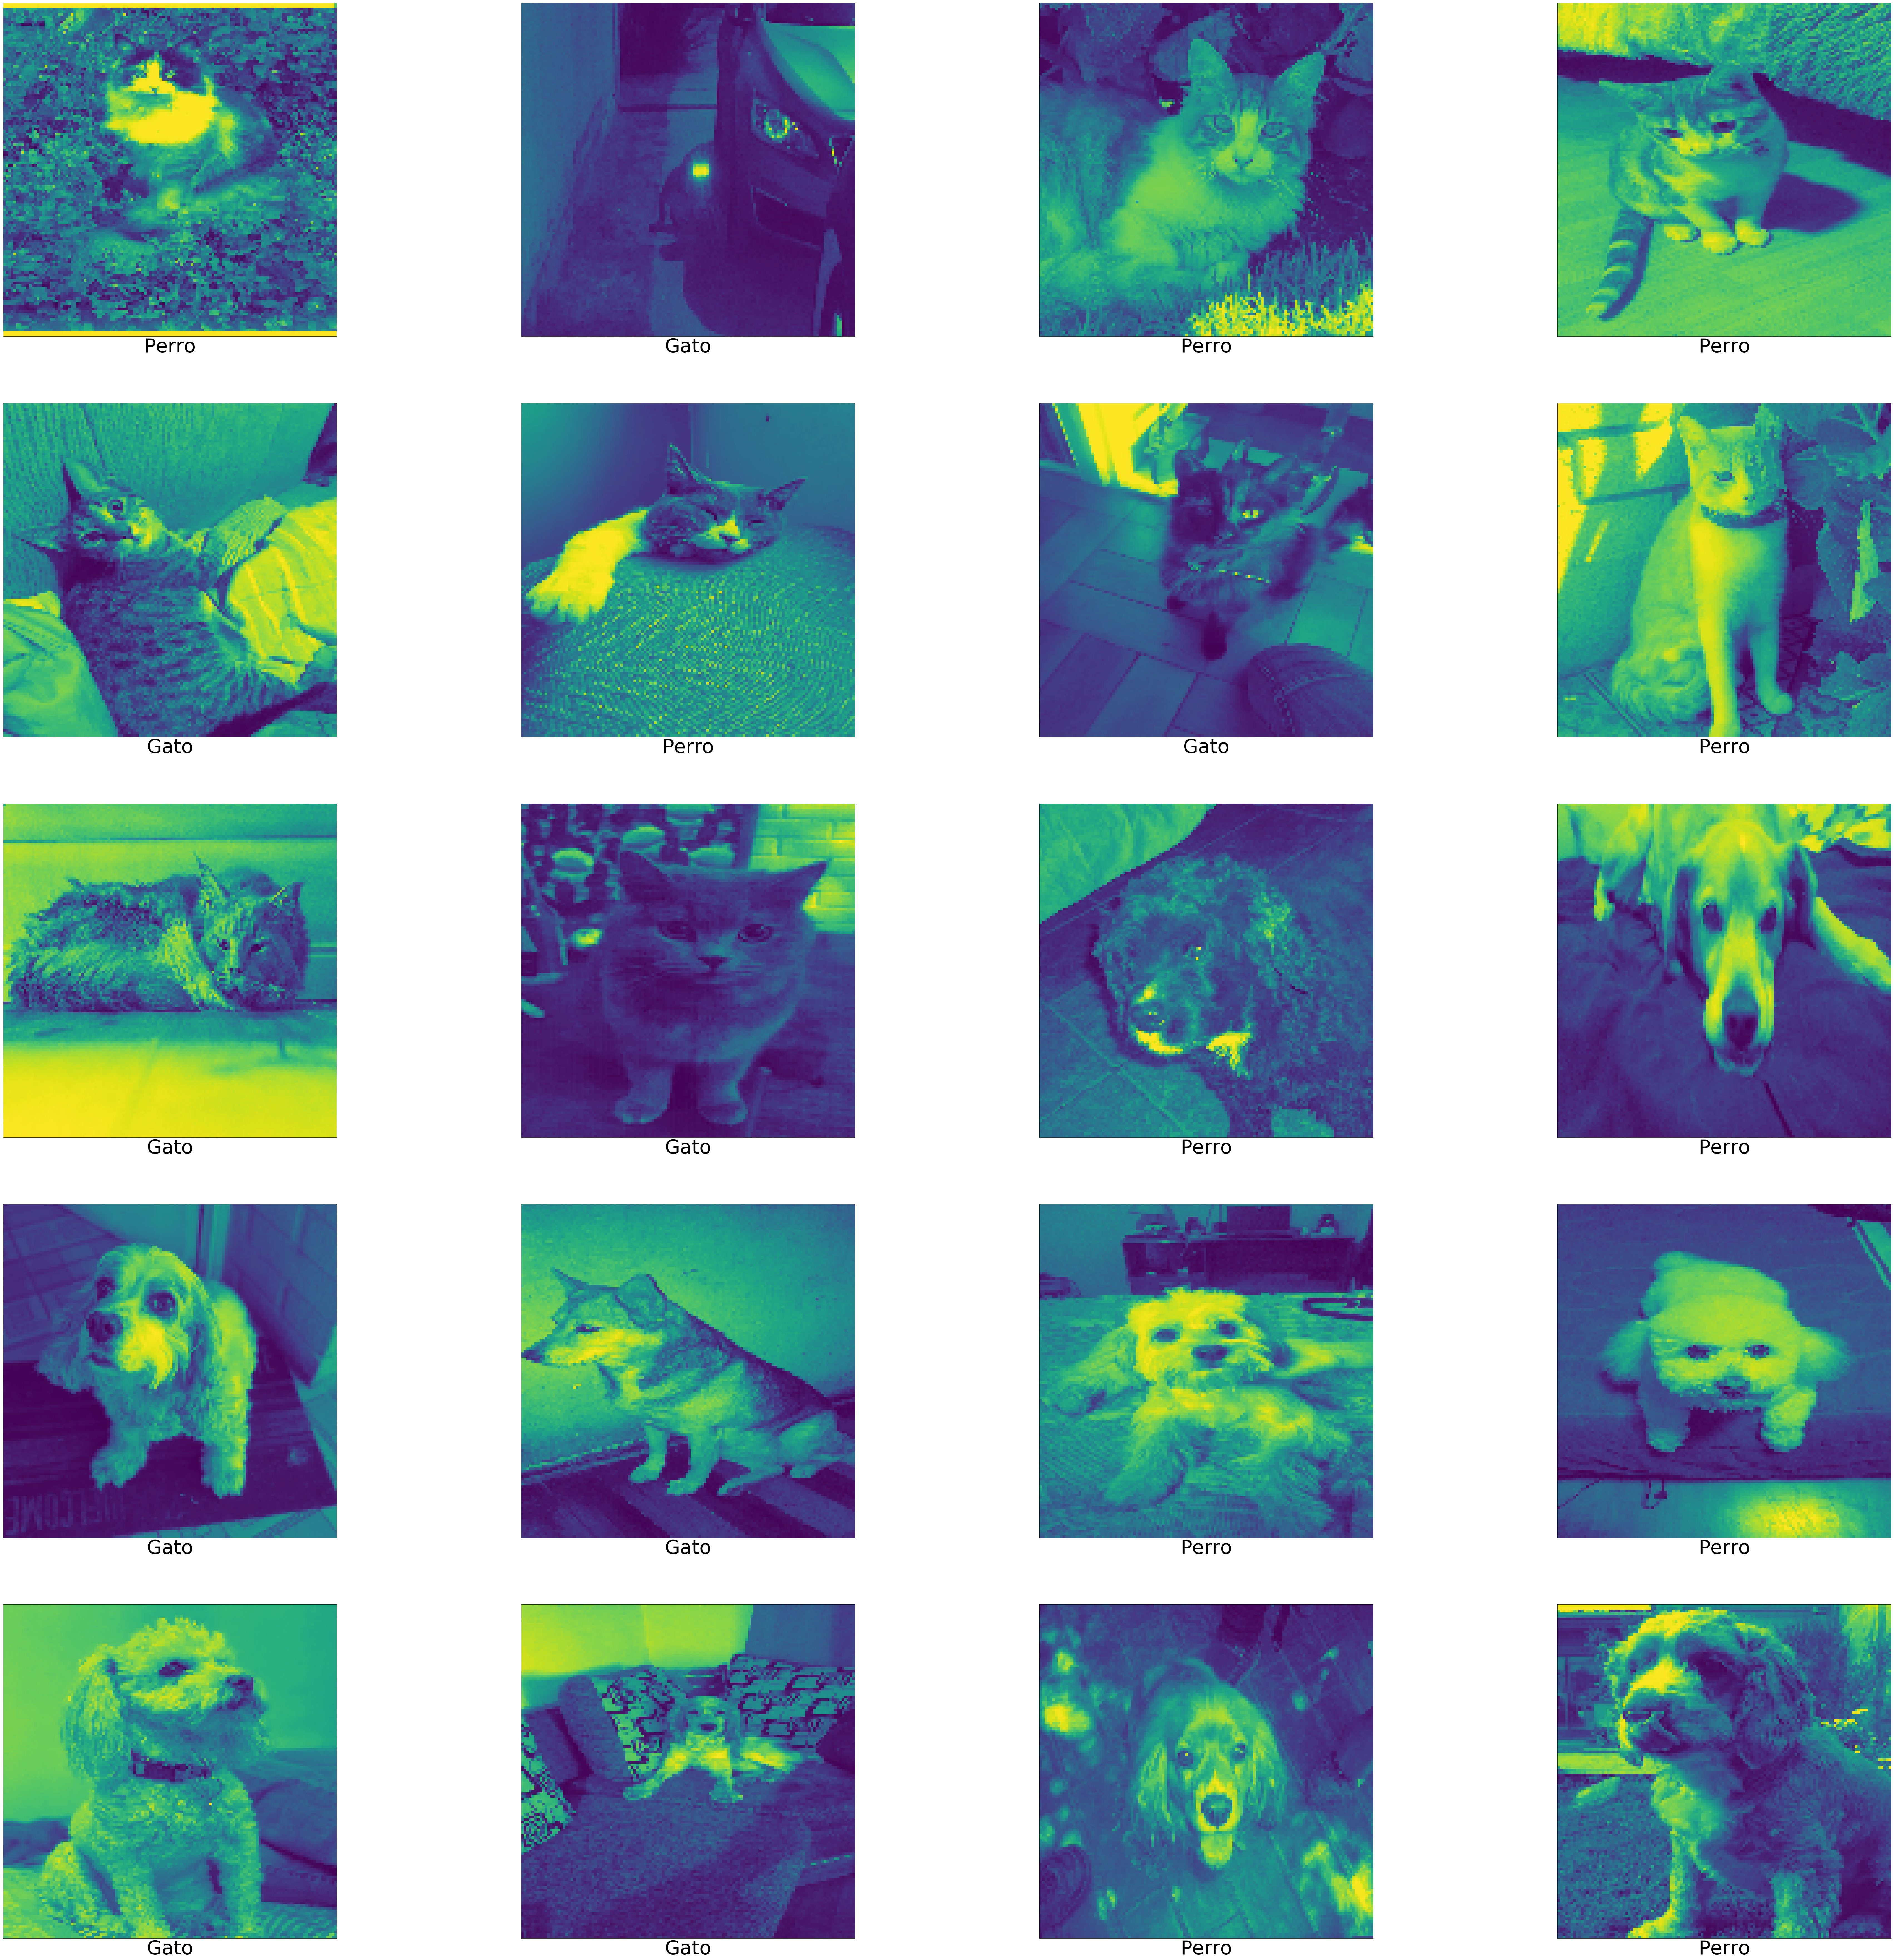

In [122]:
plt.figure(figsize=(128,128))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_valO[i])
    if prediccion[i] == 0:
        plt.xlabel('Gato', fontsize = 70)
    else:
        plt.xlabel('Perro', fontsize = 70)
plt.show()

## Analisis

